### Introdução

Este notebook contém o processo de exploração e análise dos dados de uma base sobre a Doença de Alzheimer, uma demência neurodegenerativa que afeta majoritariamente pessoas de idade. A base contém dados sobre 2,149 pacientes divididos entre diagnosticados e saudáveis.

### Descrição dos Dados

- Detalhes demográficos
- Fatores de estilo-de-vida
- Histórico médico
- Fatores clínicos
- Avaliações cognitivas
- Sintomas
- Diagnóstico

### Objetivos desse Trabalho

1. Explorar a base de dados afim de descobrir relações entre os fatores presentes;
2. Criar uma hipótese relacionada aos dados;
3. Provar ou refutar a hipótese criada.

In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://drive.google.com/file/d/1MAIcOcX2CkAwVjZhrnust-WJ9GoZu9e-/view?usp=sharing'
output = 'alzheimer_disease_data.csv'
gdown.download(url,output, fuzzy = True)

Downloading...
From: https://drive.google.com/uc?id=1MAIcOcX2CkAwVjZhrnust-WJ9GoZu9e-
To: /content/alzheimer_disease_data.csv
100%|██████████| 605k/605k [00:00<00:00, 12.4MB/s]


'alzheimer_disease_data.csv'

In [ ]:
df = pd.read_csv('/content/alzheimer_disease_data.csv')

### Exploração Inicial

In [ ]:
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [ ]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Conta usuários diagnosticados com alzheimer
mapped_diagnosis = df['Diagnosis'].map({0: "Healthy", 1: "Alzheimer's"})
mapped_diagnosis.value_counts()

Diagnosis
Healthy        1389
Alzheimer's     760
Name: count, dtype: int64

In [ ]:
# Distribuição de idades
print(sorted(df['Age'].unique()))

[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


<ipython-input-9-4dbf954f17c1>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([400, 300, 200, 100, 0, 100, 200, 300])


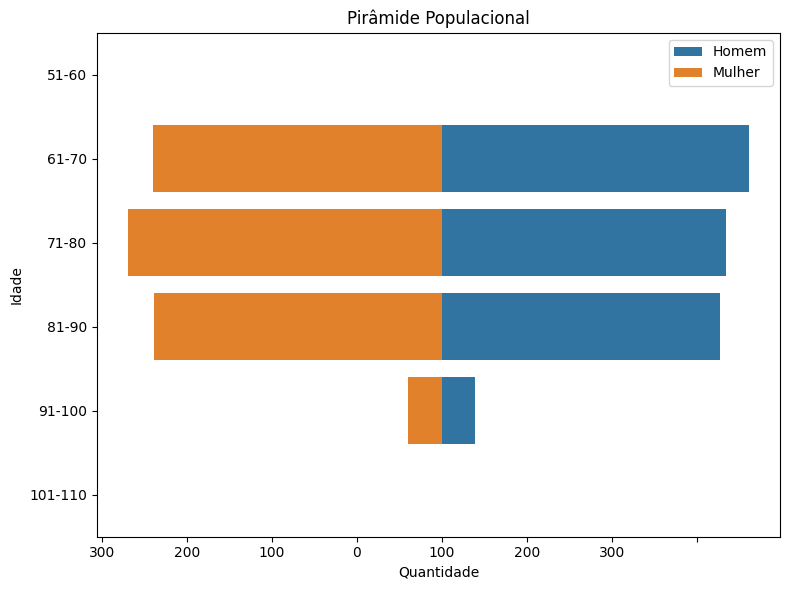

In [ ]:
# Pirâmide populacional
age_bins = [50, 60, 70, 80, 90, 100, 110]
age_labels = ['51-60', '61-70', '71-80', '81-90', '91-100', '101-110']
df_cpy = df.copy()
df_cpy['AgeGroup'] = pd.cut(df_cpy['Age'], bins=age_bins, labels=age_labels, right=False)

age_gender_counts = df_cpy.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)
age_gender_counts.columns = ['Homem', 'Mulher']

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Homens
sns.barplot(x=age_gender_counts['Homem'],
            y=age_gender_counts.index, label='Homem', orient='h', ax=ax)

# Mulheres
sns.barplot(x=-age_gender_counts['Mulher'],
            y=age_gender_counts.index, label='Mulher', orient='h', ax=ax)

ax.set_xticklabels([400, 300, 200, 100, 0, 100, 200, 300])
ax.set_xlabel('Quantidade')
ax.set_ylabel('Idade')
ax.set_title('Pirâmide Populacional')
ax.legend()

plt.tight_layout()
plt.show()

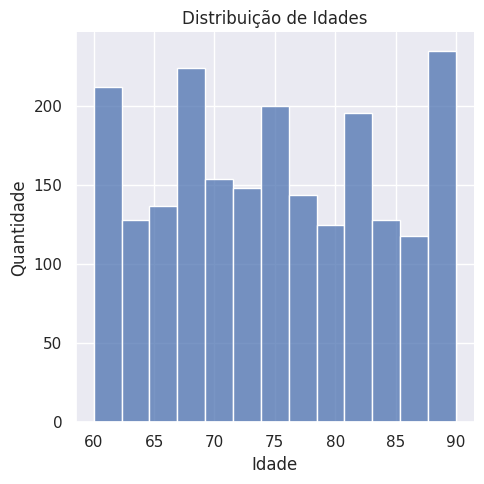

In [ ]:
sns.set_theme(style="darkgrid")

sns.displot(data=df, x='Age')

plt.title("Distribuição de Idades")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

<ipython-input-10-0eddd084f296>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Nenhuma', 'Ensino Médio', 'Graduação', 'Pós-Grad'])


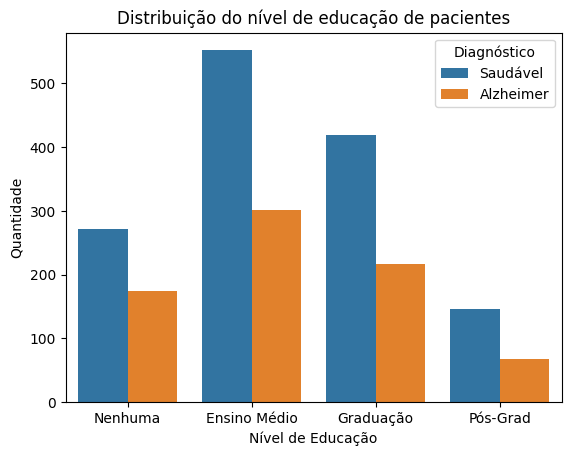

In [ ]:
# Nível educacional em pacientes com e sem diagnóstico
ax = sns.countplot(data=df, x='EducationLevel', hue='Diagnosis')
ax.set_xticklabels(['Nenhuma', 'Ensino Médio', 'Graduação', 'Pós-Grad'])
ax.set_xlabel('Nível de Educação')
ax.set_ylabel('Quantidade')

plt.legend(title='Diagnóstico', labels=['Saudável', 'Alzheimer'])
plt.title("Distribuição do nível de educação de pacientes")
plt.show()

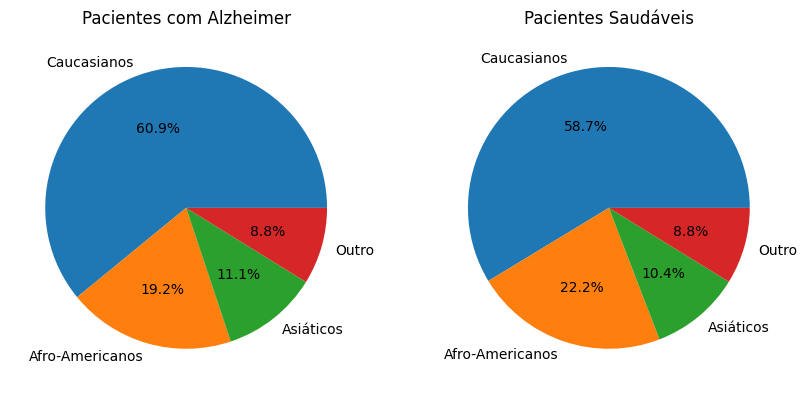

In [ ]:
healthy_patients = df[df['Diagnosis'] == 0]
alzheimer_patients = df[df['Diagnosis'] == 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ax1.pie(alzheimer_patients['Ethnicity'].value_counts(),
        labels=['Caucasianos', 'Afro-Americanos', 'Asiáticos', 'Outro'],
        autopct='%1.1f%%')
ax1.set_title('Pacientes com Alzheimer')

ax2.pie(healthy_patients['Ethnicity'].value_counts(),
        labels=['Caucasianos', 'Afro-Americanos', 'Asiáticos', 'Outro'],
        autopct='%1.1f%%')
ax2.set_title('Pacientes Saudáveis')

plt.show()

### Consumo de Álcool

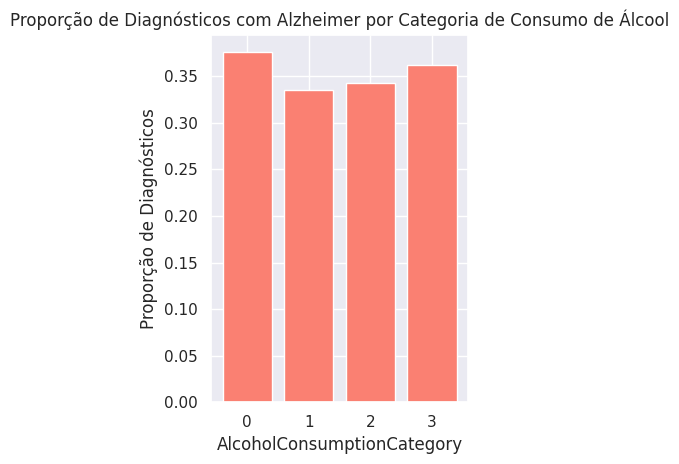

In [ ]:
# Definir os intervalos e rótulos
bins = [0, 5, 10, 15, 20]
labels = [ 0, 1, 2, 3]

# Adicionar uma nova coluna com as categorias
df['AlcoholConsumptionCategory'] = pd.cut(df['AlcoholConsumption'], bins=bins, labels=labels, right=False)

# Agrupando os dados por AlcoholConsumptionCategory
grouped = df.groupby('AlcoholConsumptionCategory').agg({
    'MemoryComplaints': lambda x: (x == 1).mean(),  # Proporção de MemoryComplaints == 1
    'Diagnosis': lambda x: (x == 1).mean()  # Proporção de diagnósticos com Diagnosis == 1
}).reset_index()

# Preparando os dados para o gráfico
categories = grouped['AlcoholConsumptionCategory']
proportion_memory_complaints = grouped['MemoryComplaints']
proportion_diagnosis_1 = grouped['Diagnosis']


# Plotando o segundo gráfico: proporção de diagnósticos com Diagnosis == 1
plt.subplot(1, 2, 2)
plt.bar(categories, proportion_diagnosis_1, color='salmon')
plt.title('Proporção de Diagnósticos com Alzheimer por Categoria de Consumo de Álcool')
plt.xlabel('AlcoholConsumptionCategory')
plt.ylabel('Proporção de Diagnósticos')

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

Text(0, 0.5, 'Proporção de MemoryComplaints == 1')

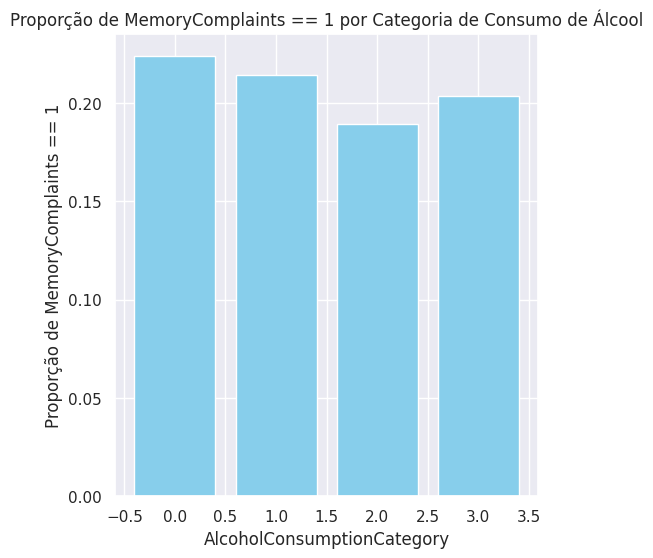

In [ ]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Plotando o primeiro gráfico: proporção de MemoryComplaints == 1
plt.subplot(1, 2, 1)
plt.bar(categories, proportion_memory_complaints, color='skyblue')
plt.title('Proporção de MemoryComplaints == 1 por Categoria de Consumo de Álcool')
plt.xlabel('AlcoholConsumptionCategory')
plt.ylabel('Proporção de MemoryComplaints == 1')


### Relações com o Diagnóstico de Alzheimer

In [ ]:
# Agrupar por 'Diagnosis' e 'Smoking' e contar o número de ocorrências
grouped = df.groupby(['Diagnosis', 'Smoking']).size().reset_index(name='count')

grouped

,Diagnosis,Smoking,count
0,0,0,986
1,0,1,403
2,1,0,543
3,1,1,217


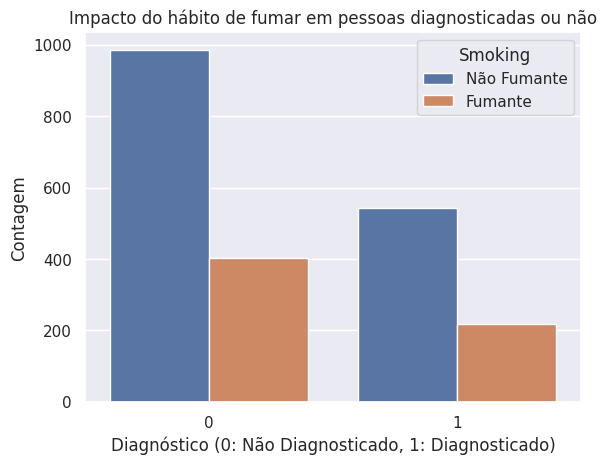

In [ ]:
# Mapear os valores de 'Smoking' para labels mais descritivos
grouped['Smoking'] = grouped['Smoking'].map({0: 'Não Fumante', 1: 'Fumante'})

# Plotar o gráfico usando seaborn
sns.barplot(x='Diagnosis', y='count', hue='Smoking', data=grouped)

# Adicionar título e rótulos aos eixos
plt.title('Impacto do hábito de fumar em pessoas diagnosticadas ou não')
plt.xlabel('Diagnóstico (0: Não Diagnosticado, 1: Diagnosticado)')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

In [ ]:


# Exibir o resultado
print(df)

      PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQua

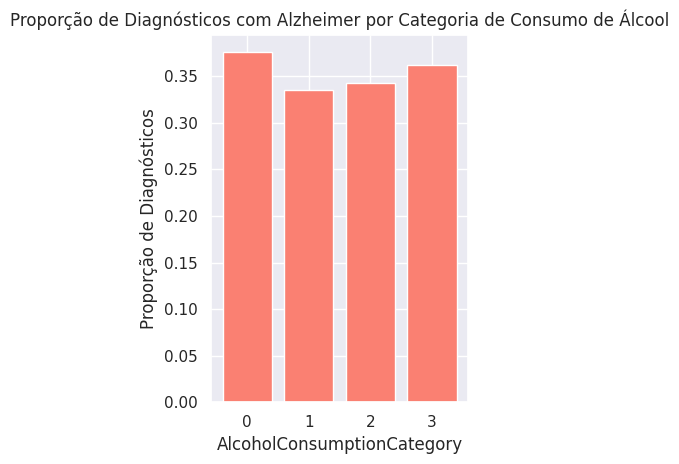

In [ ]:
# Agrupar por 'Diagnosis' e 'Smoking' e contar o número de ocorrências
grouped2 = df.groupby(['Diagnosis', 'FamilyHistoryAlzheimers']).size().reset_index(name='count')

grouped2

,Diagnosis,FamilyHistoryAlzheimers,count
0,0,0,1024
1,0,1,365
2,1,0,583
3,1,1,177


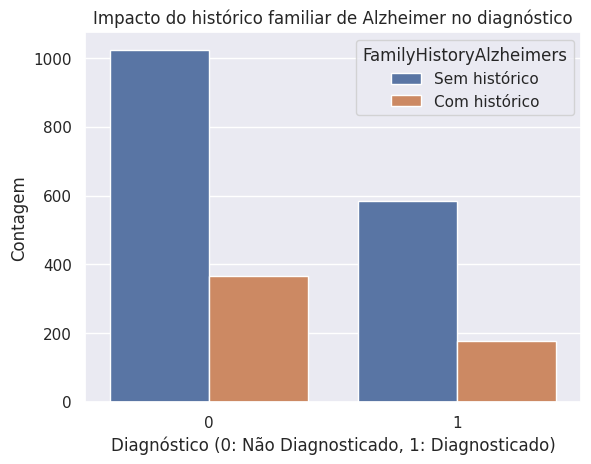

In [ ]:
# Mapear os valores de 'Smoking' para labels mais descritivos
grouped2['FamilyHistoryAlzheimers'] = grouped2['FamilyHistoryAlzheimers'].map({0: 'Sem histórico', 1: 'Com histórico'})

# Plotar o gráfico usando seaborn
sns.barplot(x='Diagnosis', y='count', hue='FamilyHistoryAlzheimers', data=grouped2)

# Adicionar título e rótulos aos eixos
plt.title('Impacto do histórico familiar de Alzheimer no diagnóstico')
plt.xlabel('Diagnóstico (0: Não Diagnosticado, 1: Diagnosticado)')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

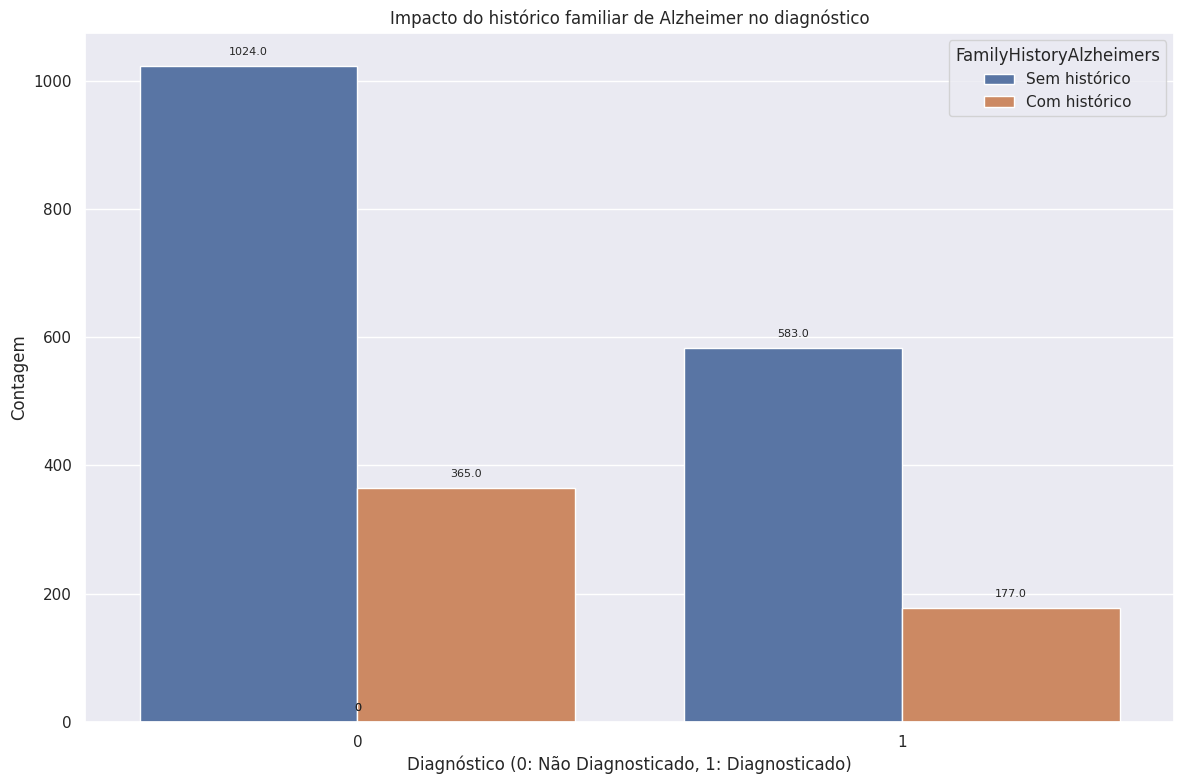

In [ ]:
# Agrupamento e contagem
grouped = df.groupby(['Diagnosis', 'FamilyHistoryAlzheimers']).size().reset_index(name='count')

# Mapear os valores de 'FamilyHistoryAlzheimers' para labels mais descritivos
grouped['FamilyHistoryAlzheimers'] = grouped['FamilyHistoryAlzheimers'].map({0: 'Sem histórico', 1: 'Com histórico'})

# Calcular porcentagens para cada barra
totals = grouped.groupby('Diagnosis')['count'].transform('sum')
grouped['percentage'] = (grouped['count'] / totals) * 100

# Plotar o gráfico usando seaborn
# Ajuste de largura do gráfico
fig, ax = plt.subplots(figsize=(12, 8))  # Ajustar o tamanho da figura conforme necessário
sns.barplot(x='Diagnosis', y='count', hue='FamilyHistoryAlzheimers', data=grouped)

# Adicionar os valores ao topo de cada barra com tamanho de fonte reduzido
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Adicionar título e rótulos aos eixos
plt.title('Impacto do histórico familiar de Alzheimer no diagnóstico')
plt.xlabel('Diagnóstico (0: Não Diagnosticado, 1: Diagnosticado)')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.tight_layout()  # Ajustar layout para evitar sobreposição de elementos
plt.show()

#Porcentagens de pessoas sem histórico não diagnosticadas
#73,7%
#Porcentagem de pessoas com histórico não diagnosticadas
#26,2

#Porcentagens de pessoas sem histórico diagnosticadas
#78,7%
#Porcentagem de pessoas com histórico diagnosticadas
#21,2%

In [ ]:
def classify_physical_activity(hours):
    if hours <= 3:
        return '0-3'
    else:
        return '3-10'
df['PhysicalActivityGroup'] = df['PhysicalActivity'].apply(classify_physical_activity)
grouped = df.groupby(['Diagnosis', 'PhysicalActivityGroup']).size().reset_index(name='count')
grouped

,Diagnosis,PhysicalActivityGroup,count
0,0,0-3,430
1,0,3-10,959
2,1,0-3,226
3,1,3-10,534


In [ ]:
def classify_diet_quality(score):
    if score <= 3:
        return '0-3'
    elif score <= 6:
        return '4-6'
    else:
        return '7-10'
df['DietQualityGroup'] = df['DietQuality'].apply(classify_diet_quality)
grouped = df.groupby(['Diagnosis', 'DietQualityGroup']).size().reset_index(name='count')
grouped

,Diagnosis,DietQualityGroup,count
0,0,0-3,433
1,0,4-6,383
2,0,7-10,573
3,1,0-3,226
4,1,4-6,228
5,1,7-10,306


In [ ]:
grouped5 = df.groupby(['Diagnosis', 'Depression']).size().reset_index(name='count')
grouped5

,Diagnosis,Depression,count
0,0,0,1108
1,0,1,281
2,1,0,610
3,1,1,150


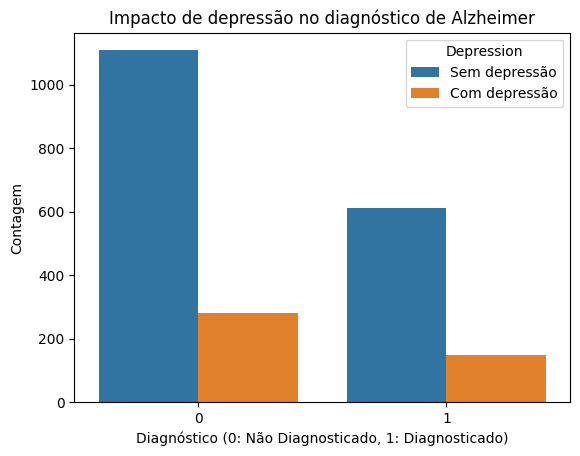

In [ ]:
# Mapear os valores de 'Smoking' para labels mais descritivos
grouped5['Depression'] = grouped5['Depression'].map({0: 'Sem depressão', 1: 'Com depressão'})

# Plotar o gráfico usando seaborn
sns.barplot(x='Diagnosis', y='count', hue='Depression', data=grouped5)

# Adicionar título e rótulos aos eixos
plt.title('Impacto de depressão no diagnóstico de Alzheimer')
plt.xlabel('Diagnóstico (0: Não Diagnosticado, 1: Diagnosticado)')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

In [ ]:
def classify_ldl(ldl):
    if ldl < 100:
        return 'Bom'
    else:
        return 'Ruim'

df['LDL_Classificado'] = df['CholesterolLDL'].apply(classify_ldl)



print(df['LDL_Classificado'].value_counts())

LDL_Classificado
Ruim    1415
Bom      734
Name: count, dtype: int64


In [ ]:
grouped12 = df.groupby(['LDL_Classificado', 'Diagnosis']).size().reset_index(name='count')
print(grouped12)

  LDL_Classificado  Diagnosis  count
0              Bom          0    466
1              Bom          1    268
2             Ruim          0    923
3             Ruim          1    492


<Axes: xlabel='LDL_Classificado', ylabel='count'>

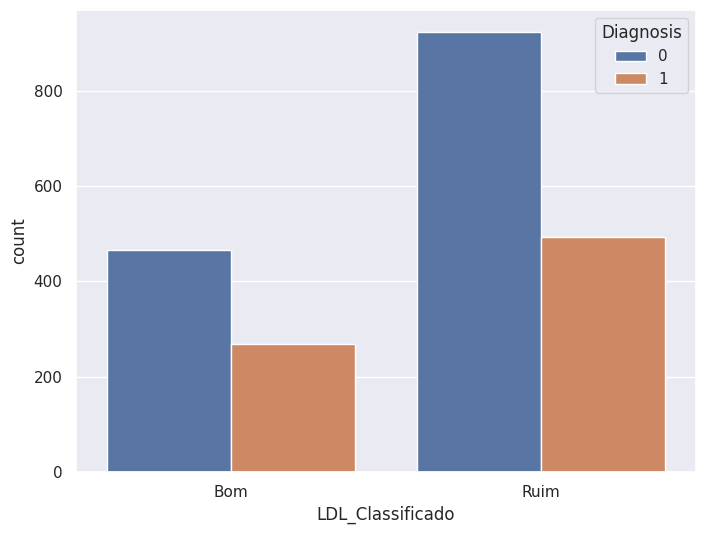

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='LDL_Classificado', y='count', hue='Diagnosis', data=grouped12)

In [ ]:
def classify_sleep_quality(score):
    if score <= 5:
        return 'Ruim'
    elif score <= 7:
        return 'Aceitável'
    else:
        return 'Bom'

df['SleepQualityGroup'] = df['SleepQuality'].apply(classify_sleep_quality)


print(df['SleepQualityGroup'].value_counts())

SleepQualityGroup
Bom          1118
Aceitável     657
Ruim          374
Name: count, dtype: int64


In [ ]:
grouped13 = df.groupby(['SleepQualityGroup', 'Diagnosis']).size().reset_index(name='count')
print(grouped13)

  SleepQualityGroup  Diagnosis  count
0         Aceitável          0    412
1         Aceitável          1    245
2               Bom          0    749
3               Bom          1    369
4              Ruim          0    228
5              Ruim          1    146


In [ ]:
grouped14 = df.groupby(['Diabetes', 'Diagnosis']).size().reset_index(name='count')
print(grouped14)

   Diabetes  Diagnosis  count
0         0          0   1168
1         0          1    657
2         1          0    221
3         1          1    103


### Relação de fumantes com os sintomas do Alzheimer


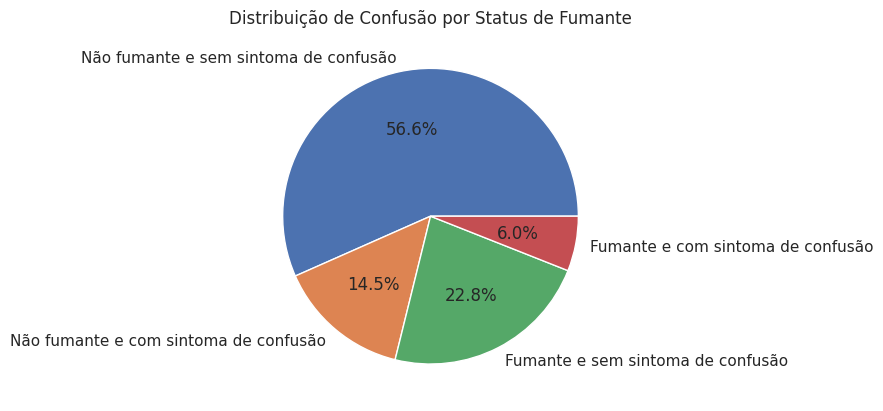

In [ ]:
grouped6 = df.groupby(['Smoking', 'Confusion']).size().reset_index(name='count')
grouped6 = df.groupby(['Smoking', 'Confusion']).size().reset_index(name='count')

# Obtenha os rótulos únicos das combinações de Smoking e Confusion
labels = grouped6[['Smoking', 'Confusion']].apply(lambda row: f"{row['Smoking']} - {row['Confusion']}", axis=1).tolist()

# Crie o gráfico de pizza com os rótulos corretos
plt.title('Distribuição de Confusão por Status de Fumante')
plt.pie(grouped6['count'], labels=["Não fumante e sem sintoma de confusão", "Não fumante e com sintoma de confusão", "Fumante e sem sintoma de confusão", "Fumante e com sintoma de confusão"], autopct='%1.1f%%')
plt.show()

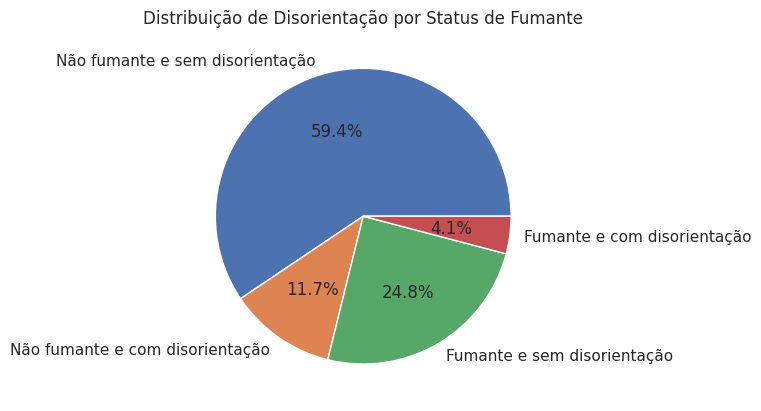

In [ ]:
grouped7 = df.groupby(['Smoking', 'Disorientation']).size().reset_index(name='count')
plt.title('Distribuição de Disorientação por Status de Fumante')
plt.pie(grouped7['count'], labels=['Não fumante e sem disorientação', 'Não fumante e com disorientação', 'Fumante e sem disorientação', 'Fumante e com disorientação'], autopct='%1.1f%%')
plt.show()

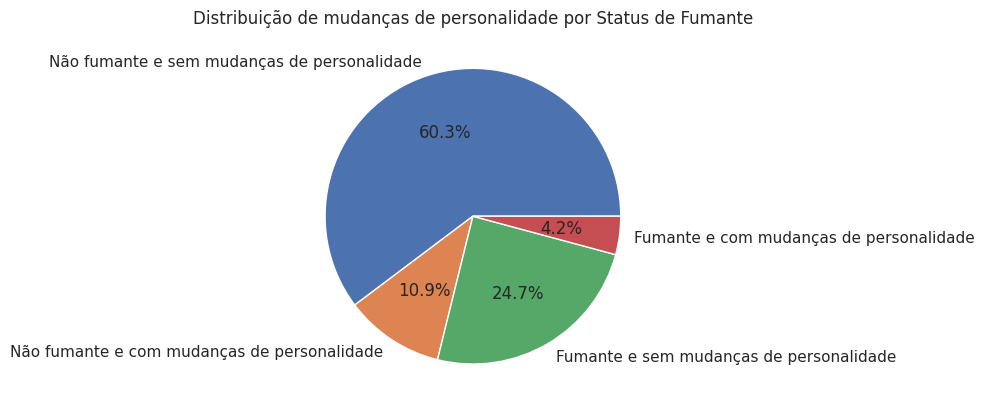

In [ ]:
grouped8 = df.groupby(['Smoking', 'PersonalityChanges']).size().reset_index(name='count')
plt.title('Distribuição de mudanças de personalidade por Status de Fumante')
plt.pie(grouped8['count'], labels=['Não fumante e sem mudanças de personalidade', 'Não fumante e com mudanças de personalidade', 'Fumante e sem mudanças de personalidade', 'Fumante e com mudanças de personalidade'], autopct='%1.1f%%')
plt.show()

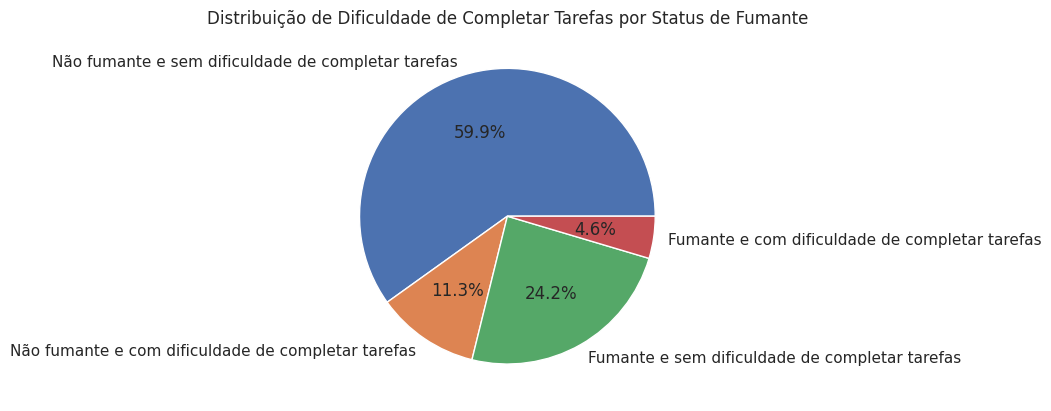

In [ ]:
grouped9 = df.groupby(['Smoking', 'DifficultyCompletingTasks']).size().reset_index(name='count')
plt.title('Distribuição de Dificuldade de Completar Tarefas por Status de Fumante')
plt.pie(grouped9['count'], labels=['Não fumante e sem dificuldade de completar tarefas', 'Não fumante e com dificuldade de completar tarefas', 'Fumante e sem dificuldade de completar tarefas', 'Fumante e com dificuldade de completar tarefas'], autopct='%1.1f%%')
plt.show()

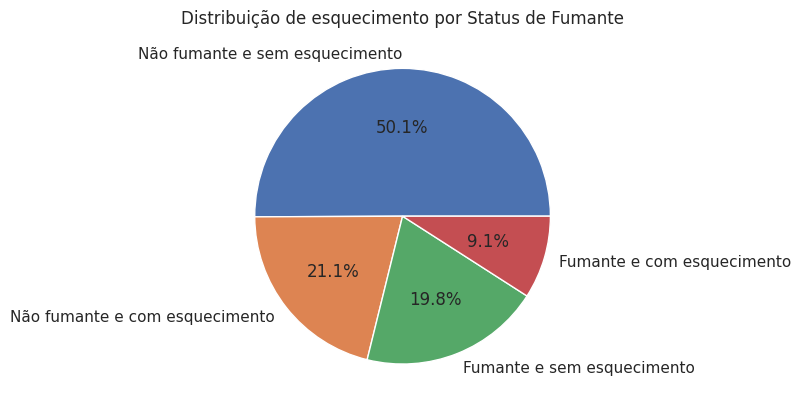

In [ ]:
grouped9 = df.groupby(['Smoking', 'Forgetfulness']).size().reset_index(name='count')
plt.title('Distribuição de esquecimento por Status de Fumante')
plt.pie(grouped9['count'], labels=['Não fumante e sem esquecimento', 'Não fumante e com esquecimento', 'Fumante e sem esquecimento', 'Fumante e com esquecimento'], autopct='%1.1f%%')
plt.show()

In [ ]:
grouped6 = df.groupby(['Smoking', 'Confusion']).size().reset_index(name='count')
grouped6

,Smoking,Confusion,count
0,0,0,1217
1,0,1,312
2,1,0,491
3,1,1,129


In [ ]:
grouped6['Smoking'] = grouped6['Smoking'].map({0: 'Não Fumante', 1: 'Fumante'})
grouped6 = grouped6.rename(columns={'Smoking': 'Fumante'})

print(grouped6)

       Fumante  Confusion  count
0  Não Fumante          0   1217
1  Não Fumante          1    312
2      Fumante          0    491
3      Fumante          1    129


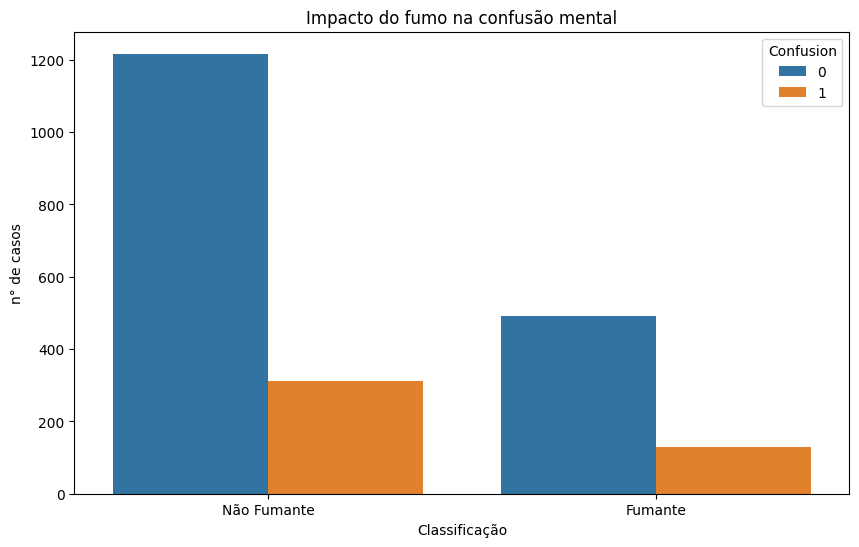

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fumante', y='count', hue='Confusion', data=grouped6)
plt.title('Impacto do fumo na confusão mental')
plt.xlabel('Classificação')
plt.ylabel('n° de casos')
plt.show()

In [ ]:
grouped7 = df.groupby(['Smoking', 'Disorientation']).size().reset_index(name='count')
grouped7

,Smoking,Disorientation,count
0,0,0,1277
1,0,1,252
2,1,0,532
3,1,1,88


In [ ]:
grouped7['Smoking'] = grouped7['Smoking'].map({0: 'Não Fumante', 1: 'Fumante'})
grouped7 = grouped7.rename(columns={'Smoking': 'Fumante'})

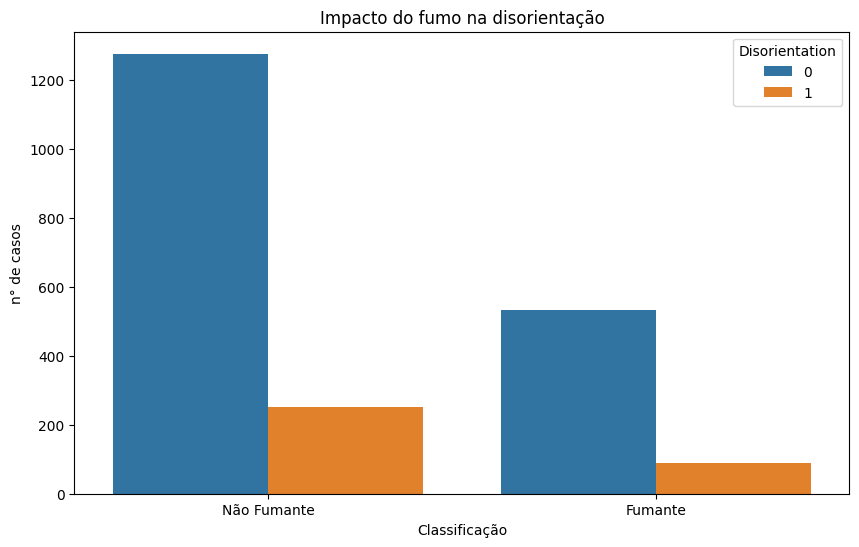

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fumante', y='count', hue='Disorientation', data=grouped7)
plt.title('Impacto do fumo na disorientação')
plt.xlabel('Classificação')
plt.ylabel('n° de casos')
plt.show()

In [ ]:
grouped8 = df.groupby(['Smoking', 'PersonalityChanges']).size().reset_index(name='count')
grouped8

,Smoking,PersonalityChanges,count
0,0,0,1295
1,0,1,234
2,1,0,530
3,1,1,90


In [ ]:
grouped8['Smoking'] = grouped8['Smoking'].map({0: 'Não Fumante', 1: 'Fumante'})
grouped8 = grouped8.rename(columns={'Smoking': 'Fumante'})

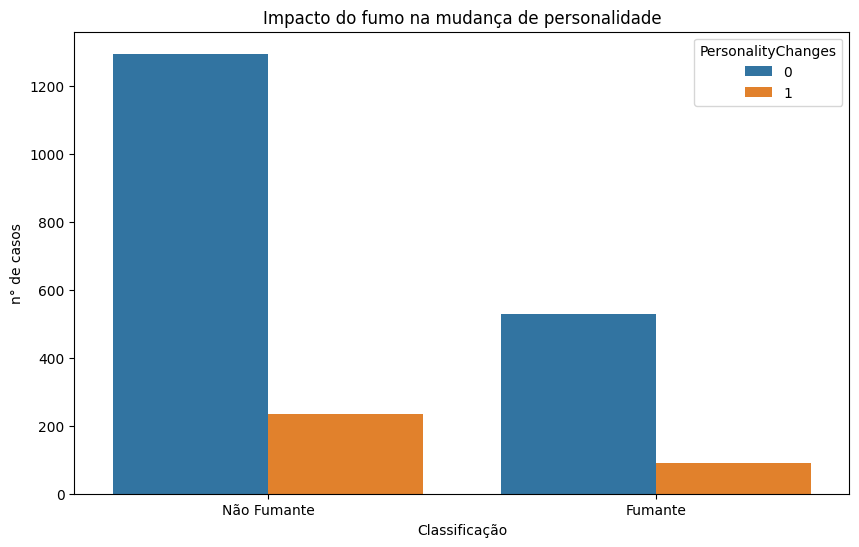

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fumante', y='count', hue='PersonalityChanges', data=grouped8)
plt.title('Impacto do fumo na mudança de personalidade')
plt.xlabel('Classificação')
plt.ylabel('n° de casos')
plt.show()

In [ ]:
grouped9 = df.groupby(['Smoking', 'DifficultyCompletingTasks']).size().reset_index(name='count')
grouped9

,Smoking,DifficultyCompletingTasks,count
0,0,0,1287
1,0,1,242
2,1,0,521
3,1,1,99


In [ ]:
grouped10 = df.groupby(['Smoking', 'Forgetfulness']).size().reset_index(name='count')
grouped10

,Smoking,Forgetfulness,count
0,0,0,1076
1,0,1,453
2,1,0,425
3,1,1,195


In [ ]:
groupe11 = df.groupby(['Smoking', 'MemoryComplaints']).size().reset_index(name='count')
groupe11

,Smoking,MemoryComplaints,count
0,0,0,1219
1,0,1,310
2,1,0,483
3,1,1,137


In [ ]:
grouped12 = df.groupby(['Smoking', 'BehavioralProblems']).size().reset_index(name='count')
grouped12

,Smoking,BehavioralProblems,count
0,0,0,1284
1,0,1,245
2,1,0,528
3,1,1,92


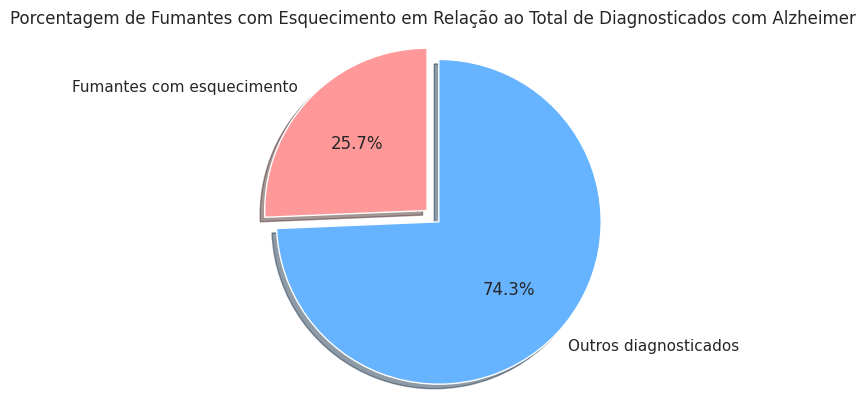

In [ ]:
percentage = (195 / 760) * 100


labels = ['Fumantes com esquecimento', 'Outros diagnosticados']
sizes = [percentage, 100 - percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Porcentagem de Fumantes com Esquecimento em Relação ao Total de Diagnosticados com Alzheimer')
plt.show()

### Importância das Variáveis na classificação de Alzheimer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

clinical_data = df[['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'Diagnosis']]
clinical_data

,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,Diagnosis
0,142,72,242.366840,56.150897,33.682563,162.189143,0
1,115,64,231.162595,193.407996,79.028477,294.630909,0
2,99,116,284.181858,153.322762,69.772292,83.638324,0
3,118,115,159.582240,65.366637,68.457491,277.577358,0
4,94,117,237.602184,92.869700,56.874305,291.198780,0
...,...,...,...,...,...,...,...
2144,122,101,280.476824,94.870490,60.943092,234.520123,1
2145,152,106,186.384436,95.410700,93.649735,367.986877,1
2146,115,118,237.024558,156.267294,99.678209,294.802338,1
2147,103,96,242.197192,52.482961,81.281111,145.253746,1


In [ ]:
X, y = clinical_data.drop('Diagnosis', axis=1), clinical_data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)

model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

scores = cross_val_score(model, X, y)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.01)


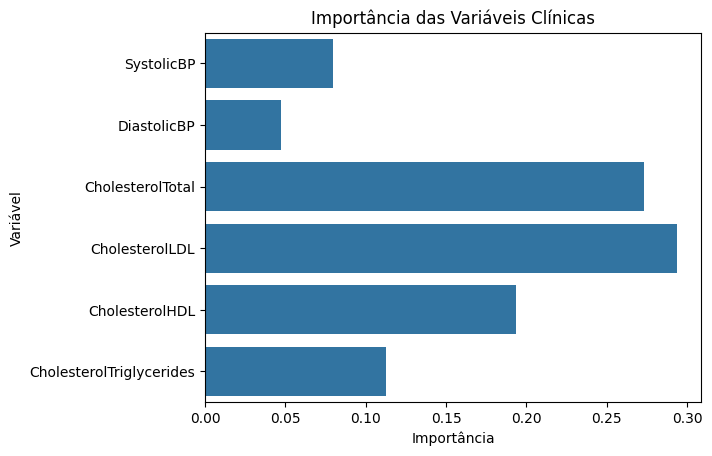

In [ ]:
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Importância das Variáveis Clínicas')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

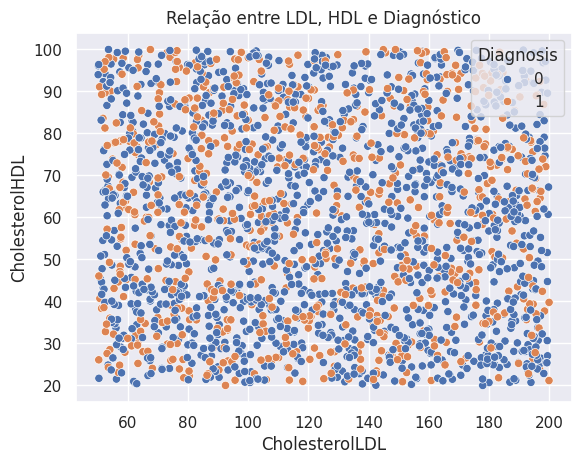

In [ ]:
sns.scatterplot(data=df, x='CholesterolLDL', y='CholesterolHDL', hue='Diagnosis')
plt.title('Relação entre LDL, HDL e Diagnóstico')
plt.show()

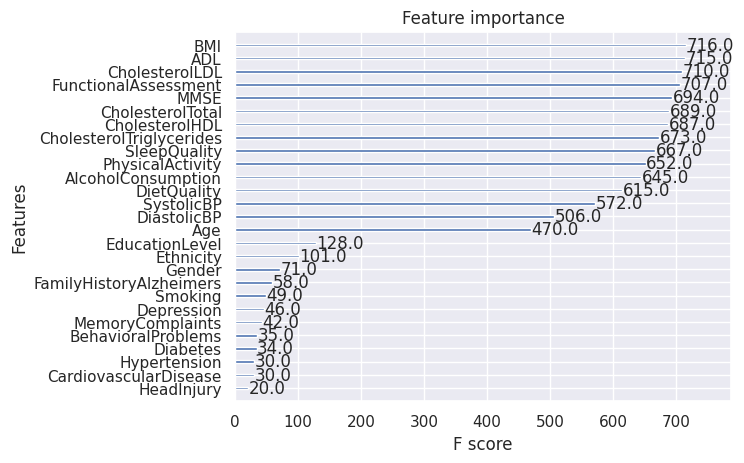

In [ ]:
import xgboost as xgb

X_train = df.drop(['PatientID', 'Diagnosis', 'DoctorInCharge', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'], axis=1)
y_train = df[['Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']]

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

xgb.plot_importance(model)
plt.show()

### Distribuição de Sintomas entre pacientes e não-pacientes

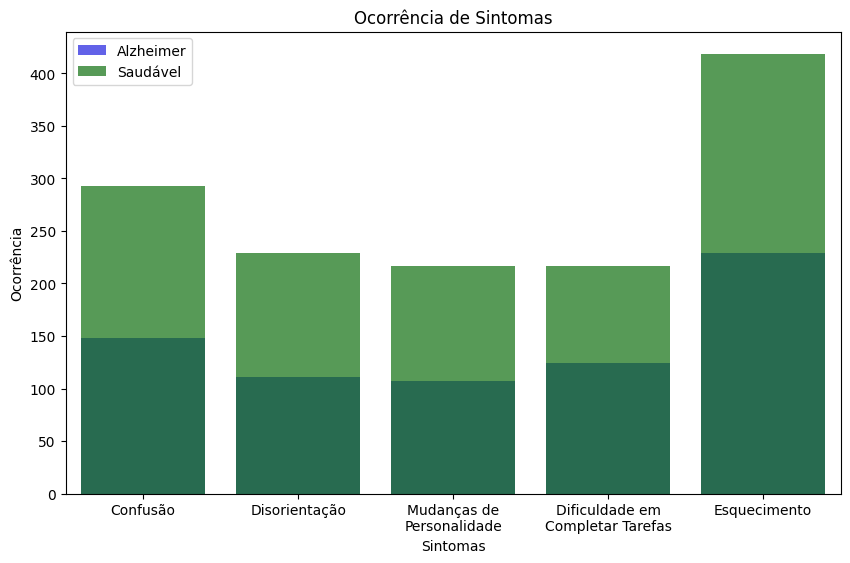

In [ ]:
symptons = df[['Diagnosis', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']]

healthy = symptons[symptons['Diagnosis'] == 0].iloc[:, 1:].sum(axis=0)
alzheimer = symptons[symptons['Diagnosis'] == 1].iloc[:, 1:].sum(axis=0)

# Plotting using Seaborn
plt.subplots(figsize=(10, 6))

sns.barplot(x=alzheimer.index, y=alzheimer.values,
            color='blue', alpha=0.7, label='Alzheimer')

sns.barplot(x=healthy.index, y=healthy.values,
            color='green', alpha=0.7, label='Saudável')

xlabels = ['Confusão', 'Disorientação', 'Mudanças de\nPersonalidade', 'Dificuldade em\nCompletar Tarefas', 'Esquecimento']
plt.xticks(range(len(xlabels)), xlabels)
plt.xlabel('Sintomas')
plt.ylabel('Ocorrência')
plt.title('Ocorrência de Sintomas')
plt.show()

### MMSE e Diagnóstico de Alzheimer

In [ ]:
def classify_mmse(score):
  if score >= 0 and score <= 10:
    return 'Severo'
  elif score > 10 and score <= 20:
    return 'Moderado'
  elif score > 20 and score <= 25:
    return 'Leve'
  elif score > 25 and score <= 30:
    return 'Normal (Consulte um médico para certificar)'
  else:
    return 'Score inválido'

df['MMSE_Classificado'] = df['MMSE'].apply(classify_mmse)

# Exiba o resultado
print(df['MMSE_Classificado'].value_counts())

MMSE_Classificado
Severo                                         745
Moderado                                       693
Leve                                           369
Normal (Consulte um médico para certificar)    342
Name: count, dtype: int64


In [ ]:
grouped17 = df.groupby(['MMSE_Classificado', 'Diagnosis']).size().reset_index(name='count')
grouped17

,MMSE_Classificado,Diagnosis,count
0,Leve,0,247
1,Leve,1,122
2,Moderado,0,403
3,Moderado,1,290
4,Normal (Consulte um médico para certificar),0,324
5,Normal (Consulte um médico para certificar),1,18
6,Severo,0,415
7,Severo,1,330


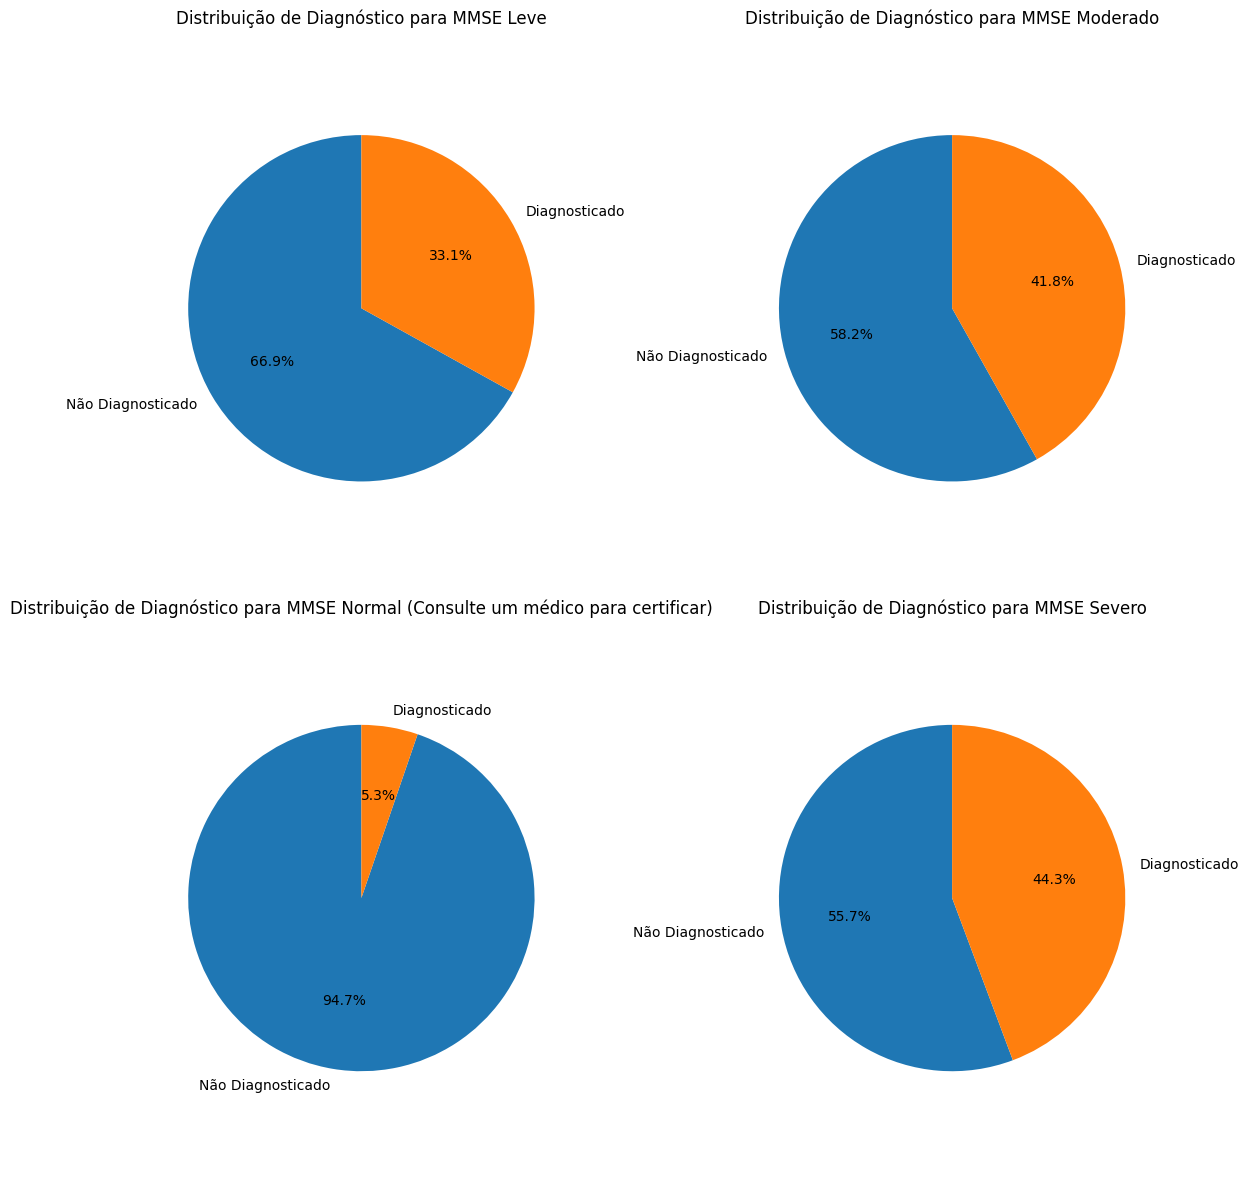

In [ ]:
grouped = df.groupby(['MMSE_Classificado', 'Diagnosis']).size().reset_index(name='count')


pie_data = {}
for mmse_class in grouped['MMSE_Classificado'].unique():
  pie_data[mmse_class] = {}
  for diagnosis in grouped['Diagnosis'].unique():
    count = grouped[(grouped['MMSE_Classificado'] == mmse_class) & (grouped['Diagnosis'] == diagnosis)]['count'].values
    if count.size > 0:
      pie_data[mmse_class][diagnosis] = count[0]
    else:
      pie_data[mmse_class][diagnosis] = 0

# Plota os gráficos de pizza
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, mmse_class in enumerate(pie_data.keys()):
  labels = ['Não Diagnosticado', 'Diagnosticado']
  sizes = [pie_data[mmse_class][0], pie_data[mmse_class][1]]
  axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
  axes[i].axis('equal')
  axes[i].set_title(f'Distribuição de Diagnóstico para MMSE {mmse_class}')

plt.tight_layout()
plt.show()

In [ ]:
grouped19 = df.groupby(['MMSE_Classificado', 'Smoking']).size().reset_index(name='count')
grouped19

,MMSE_Classificado,Smoking,count
0,Leve,0,268
1,Leve,1,101
2,Moderado,0,511
3,Moderado,1,182
4,Normal (Consulte um médico para certificar),0,228
5,Normal (Consulte um médico para certificar),1,114
6,Severo,0,522
7,Severo,1,223


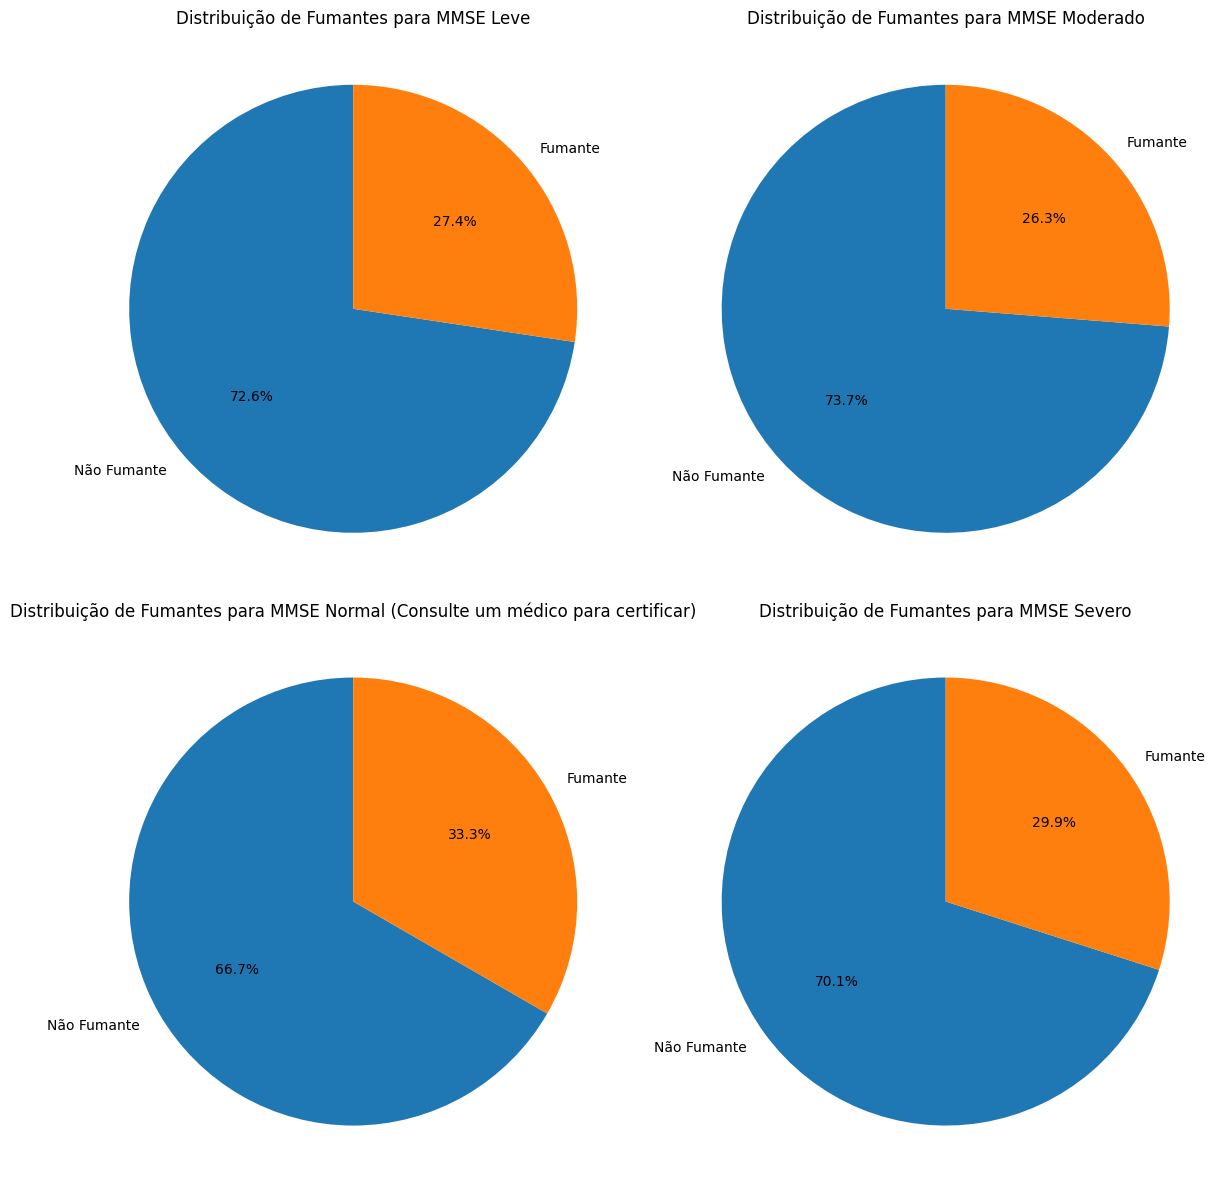

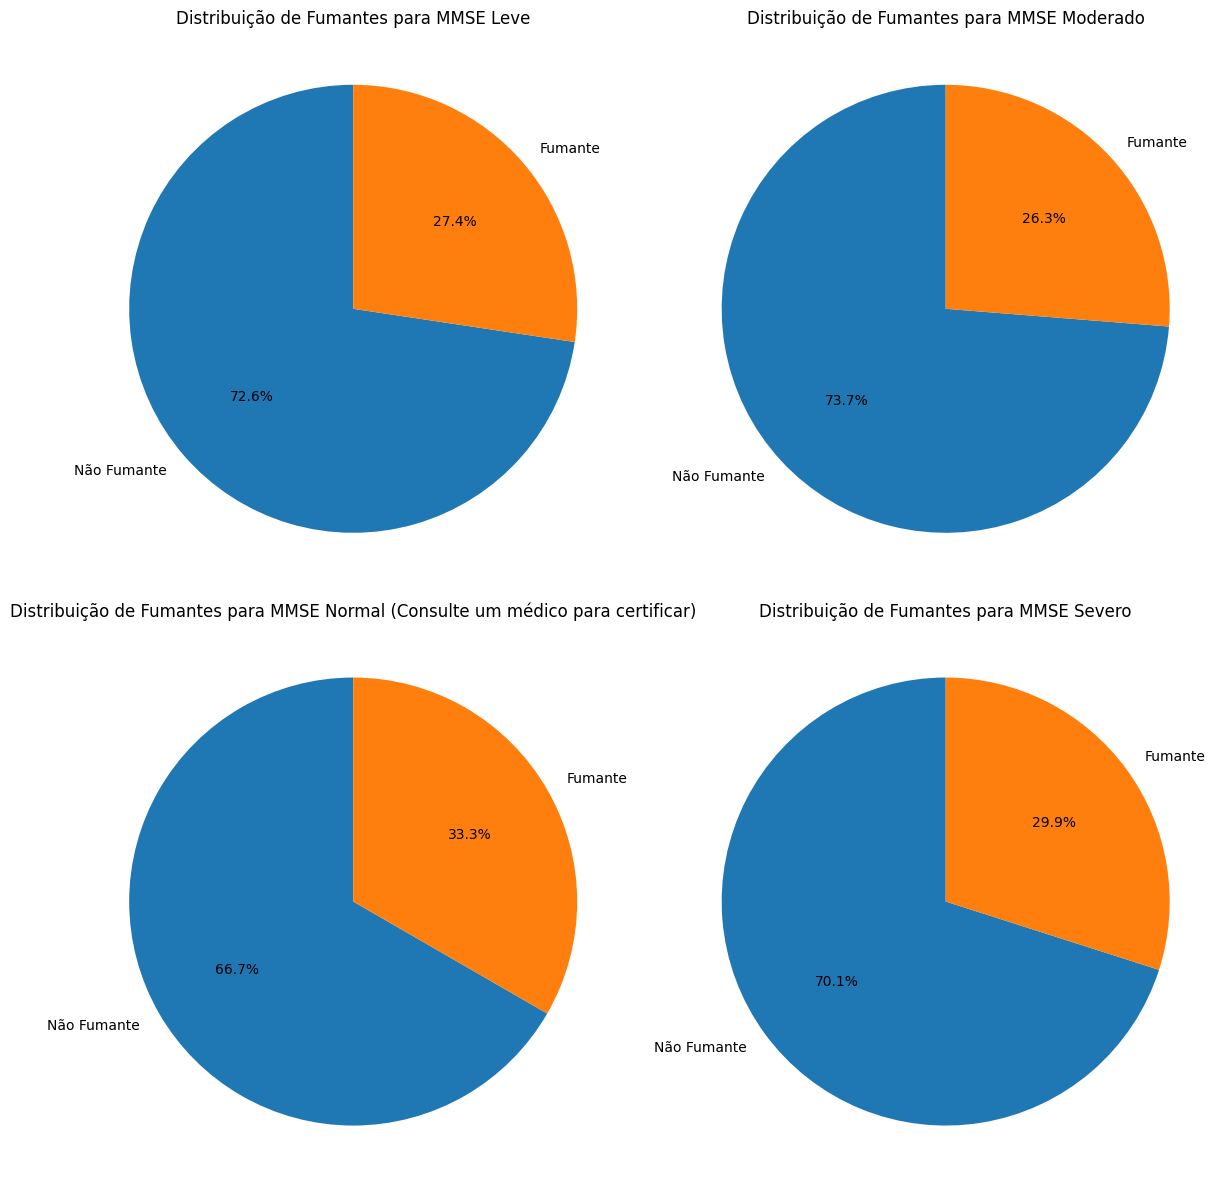

In [ ]:
grouped = df.groupby(['MMSE_Classificado', 'Smoking']).size().reset_index(name='count')


pie_data = {}
for mmse_class in grouped['MMSE_Classificado'].unique():
  pie_data[mmse_class] = {}
  for smoking_status in grouped['Smoking'].unique():
    count = grouped[(grouped['MMSE_Classificado'] == mmse_class) & (grouped['Smoking'] == smoking_status)]['count'].values
    if count.size > 0:
      pie_data[mmse_class][smoking_status] = count[0]
    else:
      pie_data[mmse_class][smoking_status] = 0

# Plota os gráficos de pizza
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, mmse_class in enumerate(pie_data.keys()):
  labels = ['Não Fumante', 'Fumante']
  sizes = [pie_data[mmse_class][0], pie_data[mmse_class][1]]
  axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
  axes[i].axis('equal')
  axes[i].set_title(f'Distribuição de Fumantes para MMSE {mmse_class}')

plt.tight_layout()
plt.show()
grouped = df.groupby(['MMSE_Classificado', 'Smoking']).size().reset_index(name='count')

# Cria um dicionário para armazenar os dados para o gráfico de pizza
pie_data = {}
for mmse_class in grouped['MMSE_Classificado'].unique():
  pie_data[mmse_class] = {}
  for smoking_status in grouped['Smoking'].unique():
    count = grouped[(grouped['MMSE_Classificado'] == mmse_class) & (grouped['Smoking'] == smoking_status)]['count'].values
    if count.size > 0:
      pie_data[mmse_class][smoking_status] = count[0]
    else:
      pie_data[mmse_class][smoking_status] = 0

# Plota os gráficos de pizza
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, mmse_class in enumerate(pie_data.keys()):
  labels = ['Não Fumante', 'Fumante']
  sizes = [pie_data[mmse_class][0], pie_data[mmse_class][1]]
  axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
  axes[i].axis('equal')
  axes[i].set_title(f'Distribuição de Fumantes para MMSE {mmse_class}')

plt.tight_layout()
plt.show()

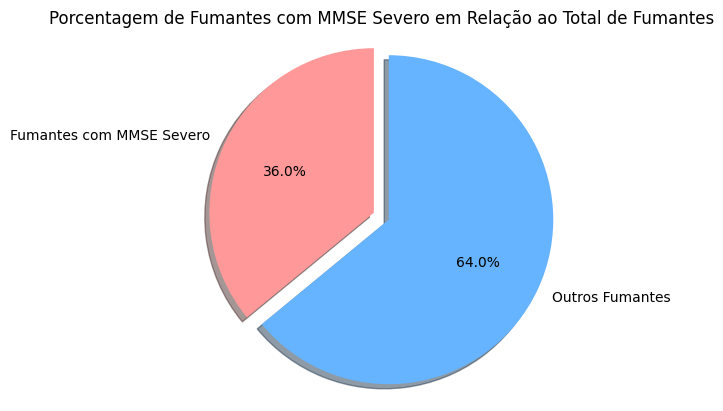

In [ ]:
percentage = (223 / 620) * 100

# Cria um gráfico de pizza para visualizar a porcentagem
labels = ['Fumantes com MMSE Severo', 'Outros Fumantes']
sizes = [percentage, 100 - percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Explode a primeira fatia (Fumantes com MMSE Severo)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Porcentagem de Fumantes com MMSE Severo em Relação ao Total de Fumantes')
plt.show()